In [33]:
#Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

#Use seaborn's load_dataset function to load the iris database to answer the following questions:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


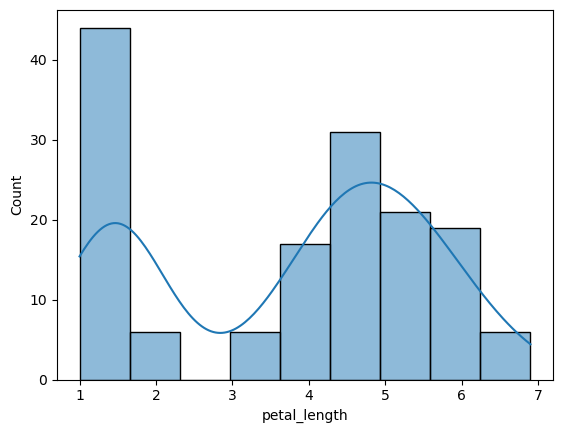

In [3]:
# 1. What does the distribution of petal lengths look like?

sns.histplot(iris.petal_length, kde=True);

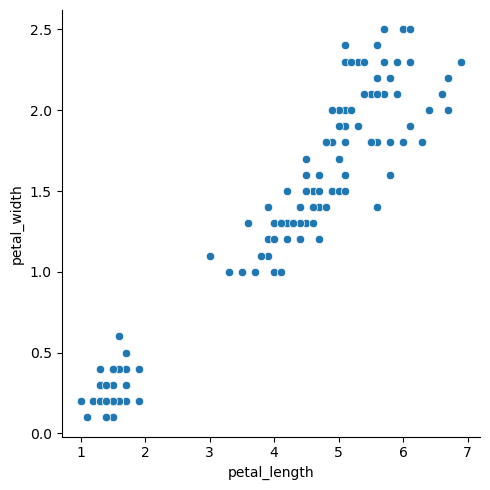

In [4]:
# 2. Is there a relationship between petal length and petal width?

sns.relplot(data = iris, x='petal_length', y='petal_width');

# Yes, there seems to be a linear correlation between length and width

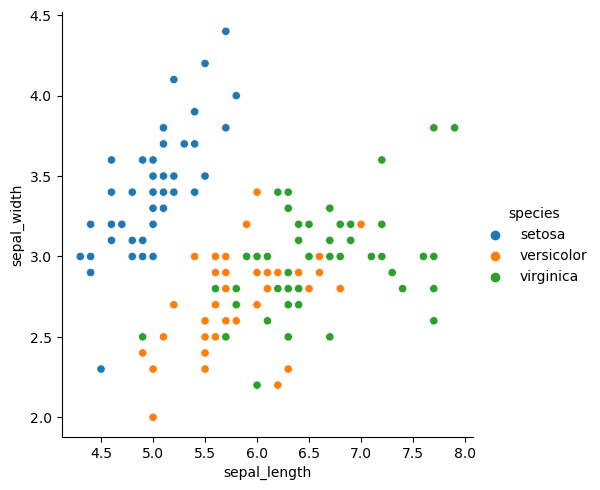

In [5]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.

sns.relplot(data = iris, x='sepal_length', y='sepal_width', hue='species');

# No, the correlation between sepal length & width do not look to be closely related to species, especially for
# versicolor vs. virginica.

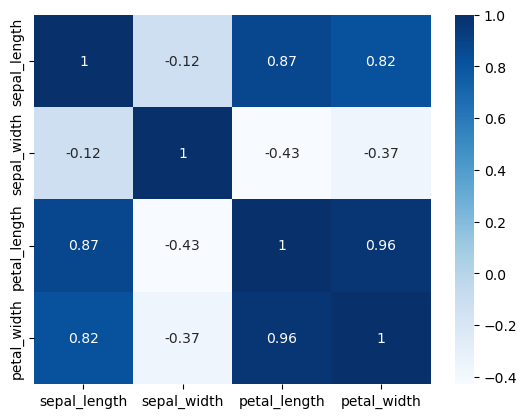

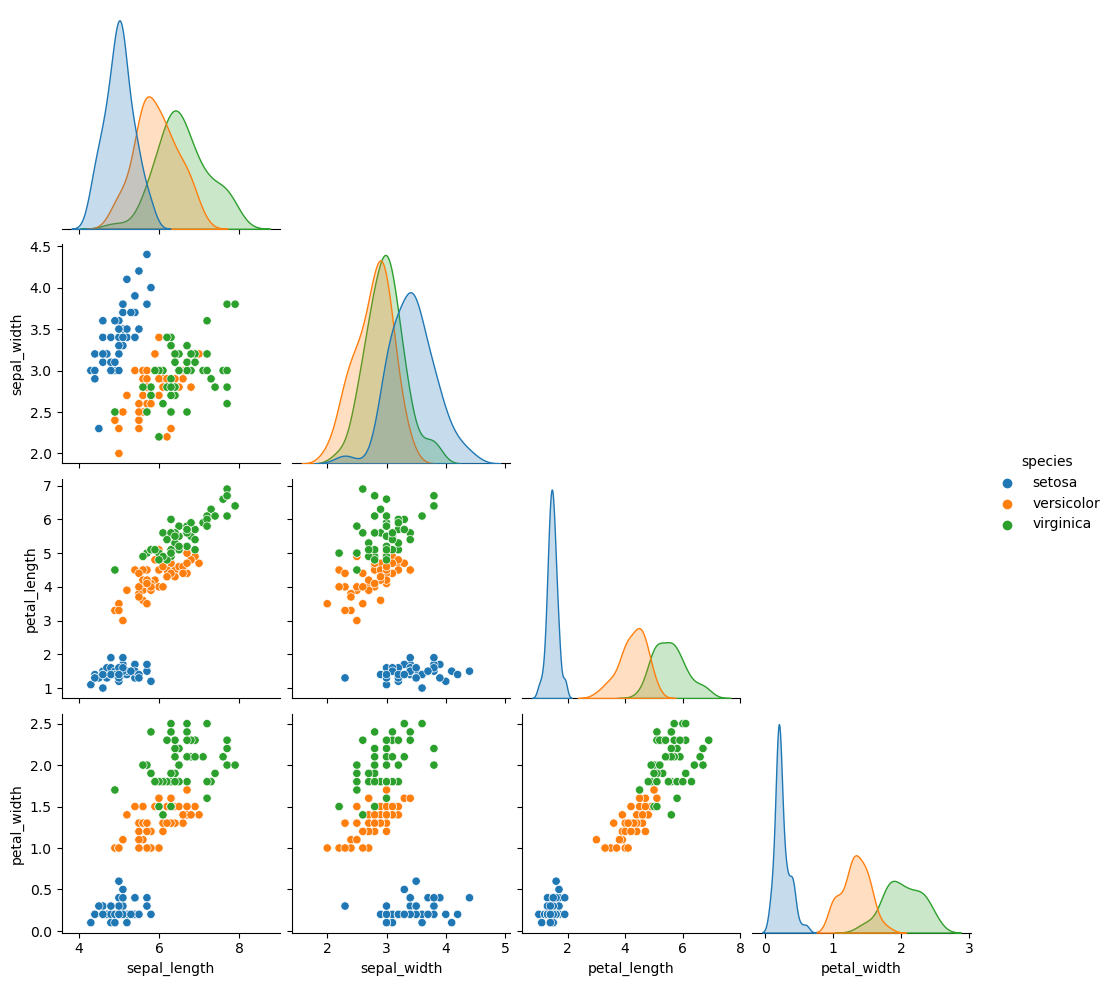

In [6]:
# 4. Which features would be best used to predict species?

sns.heatmap(iris.corr(), annot = True, cmap='Blues') #petal_length X petal_width = highest at .96

sns.pairplot(data=iris, hue='species', corner=True);

#Looking at pairplot with hues, petal_length + petal_width still remain best features to predict species.

In [7]:
# 1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate 
# summary statistics for each dataset. What do you notice?

anscombe = sns.load_dataset('anscombe')
anscombe.groupby('dataset').describe()

# Noticed groups I - III all have exact same interquartile ranges for their x-value. y-values have slightly more variation.

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

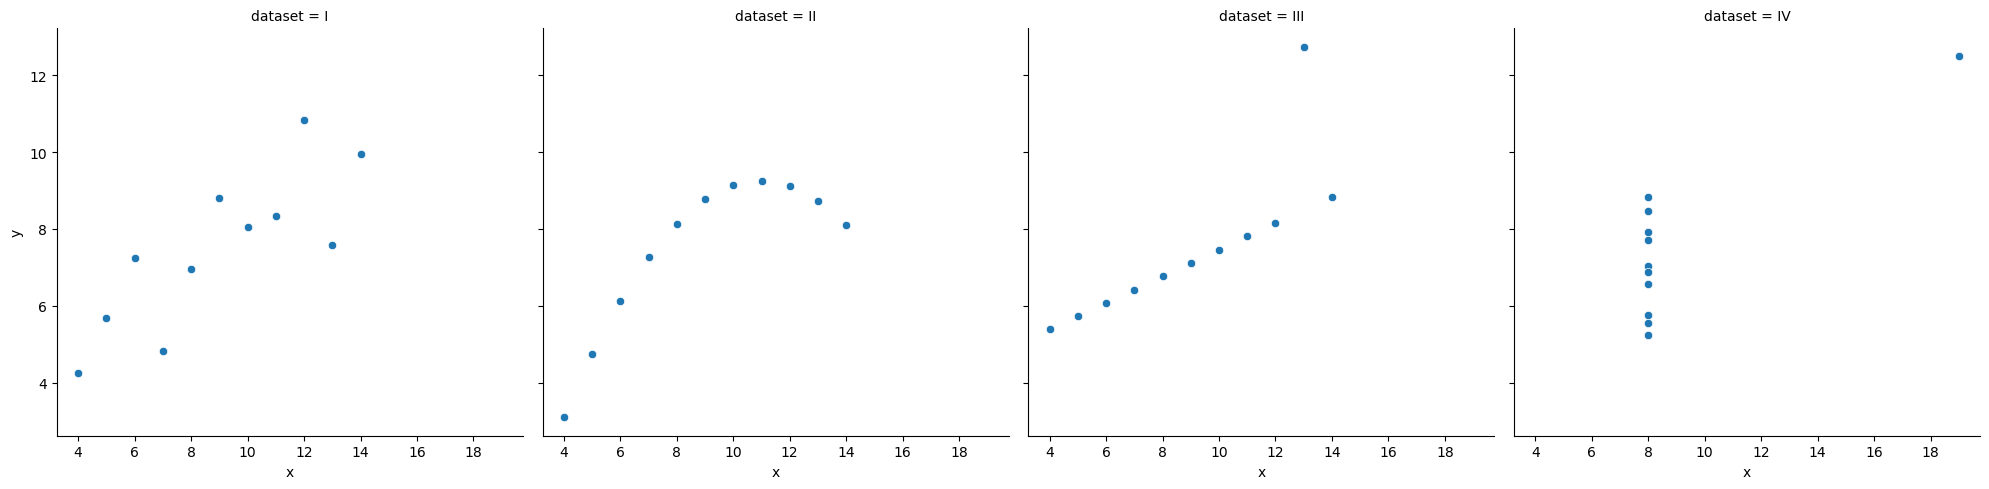

In [8]:
# - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data=anscombe, x='x', y='y', col='dataset');

In [9]:
# 2. Load the InsectSprays dataset from pydataset and read it's documentation. 

from pydataset import data

insect_sprays = data('InsectSprays', show_doc=True)
insect_sprays = data('InsectSprays')

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [10]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


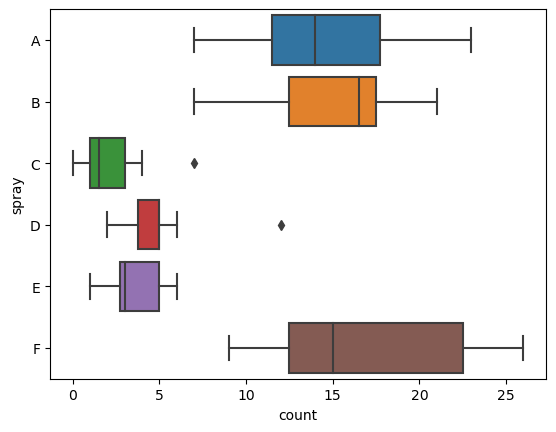

In [11]:
# - Create a boxplot that shows the effectiveness of the different insect sprays.

sns.boxplot(data=insect_sprays, x='count', y='spray');

In [12]:
# 3. Load the swiss dataset from pydataset and read its documentation. 
# Create visualizations to answer the following questions:

data('swiss', show_doc=True)

swiss = data('swiss')
swiss

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [13]:
# - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss['is_catholic'] = np.where(swiss.Catholic > 75, True, False)

swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


In [14]:
# - Does whether or not a province is Catholic influence fertility?

swiss.corr()

# There seems to be some correlation between whether a province is catholic and their fertility rate, at 0.6050.

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.605023
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.475120
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.641897
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.328808
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.957798
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.207544
is_catholic,0.605023,0.475120,-0.641897,-0.328808,0.957798,0.207544,1.000000


In [15]:
# - What measure correlates most strongly with fertility?

# Education seems to have a slightly stronger reverse correlation with fertility, i.e. the less educated a population
# is, the higher their fertility rate.

In [28]:
# 4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the 
# revenue produced by each.

from env import get_db_url

url = get_db_url('chipotle')

orders = pd.read_sql('SELECT * FROM orders', url)

In [31]:
orders.item_price = orders.item_price.str.replace('$','',regex=False).astype(float)

In [18]:
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [19]:
orders_by_price = orders.groupby('item_name').item_price.sum()

In [20]:
orders_cleaned = pd.DataFrame(orders_by_price.nlargest(4))

In [21]:
orders_cleaned = orders_cleaned.reset_index()

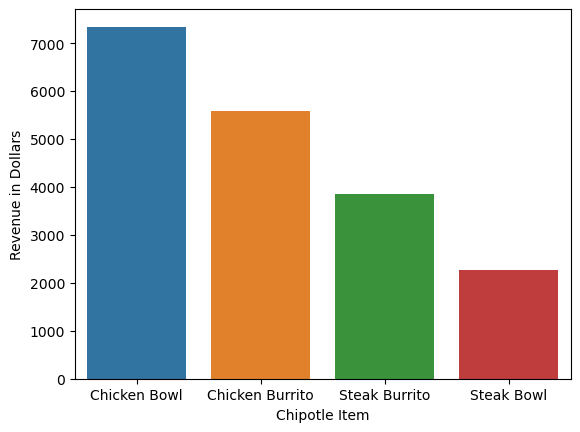

In [34]:
sns.barplot(data=orders_cleaned, x='item_name', y='item_price')
plt.xlabel('Chipotle Item')
plt.ylabel('Revenue in Dollars');

In [35]:
# 5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all
# the individual subject's reaction times and a more prominant line showing the average change in reaction time.

data('sleepstudy', show_doc=True)
sleepstudy = data('sleepstudy')

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [36]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


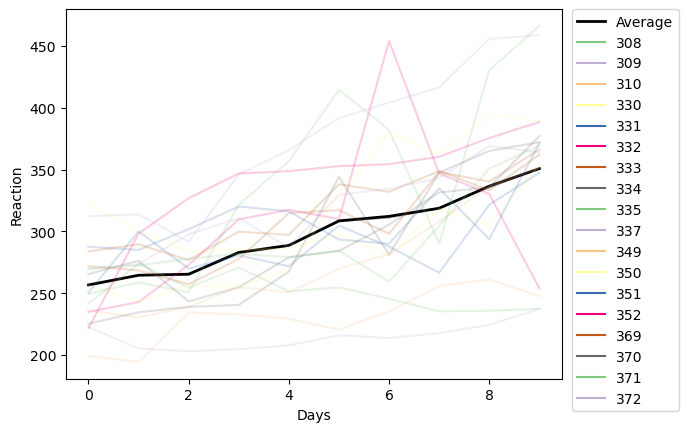

In [38]:
sns.lineplot(data=sleepstudy, x='Days', y='Reaction', estimator='mean', ci = False, linewidth=2, color='black', label='Average')
sns.lineplot(data=sleepstudy, x='Days', y='Reaction', hue='Subject', ci = False, palette='Accent', alpha=0.2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
